In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
start,end = 0,0

def get_polynomial_features(x_data,degree=0):
    return np.hstack([x_data ** i for i in range(0,degree+1)])

def plot(x_train,y_train,x_test,y_test,model,degree):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(mean_squared_error(y_test,y_pred))

    plt.scatter(x_test[:,1],y_pred,c = 'black',s = 1)
    plt.scatter(x_test[:,1],y_test,c = 'black',s = 1)
    
    plt.scatter(x_train[:,1],y_train,c = 'b',s = 1)

    x_axis = np.linspace(start,end,10000).reshape(-1,1)
    x_axis = get_polynomial_features(x_axis,degree)
    y_axis = model.predict(x_axis)
    plt.plot(x_axis[:,1],y_axis,c = 'r')

    y_tt = model.predict(x_train)
    print(mean_squared_error(y_train,y_tt))
    
    #print(model.coef_)
    print(model.named_steps["regg"].coef_)   
    return


329.9937875434118
3.6694461558812666e-21
[[ 1.22519411e-18 -6.00379169e-16 -2.98642851e-15 -1.48170926e-14
  -7.32320775e-14 -3.59854891e-13 -1.75293217e-12 -8.42658315e-12
  -3.96922270e-11 -1.81104909e-10 -7.84842260e-10 -3.11398821e-09
  -1.04422083e-08 -2.32424516e-08  6.15811556e-09 -3.72135202e-10]]


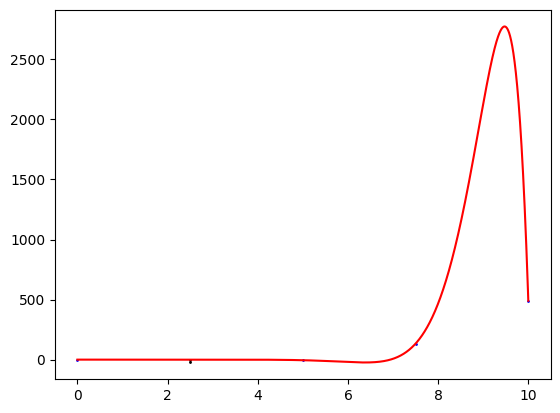

In [13]:

def linear_regression(degree,data,y_data):
    x_data = get_polynomial_features(data,degree)
    x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1,random_state=42)
    model = LinearRegression()
    plot(x_train,y_train,x_test,y_test,model,degree)

num_samples = 5
degree = 15
start,end = 0,10
data = np.linspace(start,end,num_samples).reshape(-1,1)
y_data = data**3 - 5*data**2 - data + np.random.normal(loc = 0, scale = 0.1, size = num_samples).reshape(-1,1)

linear_regression(degree,data,y_data)

104.90285331058506
1.0837905510636763e-24
[  0.         -61.78549606  56.02411651  80.03498052  67.89834564
  45.05624673  21.55672703   0.96725267 -15.84938755]


/Users/sahilpandey/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


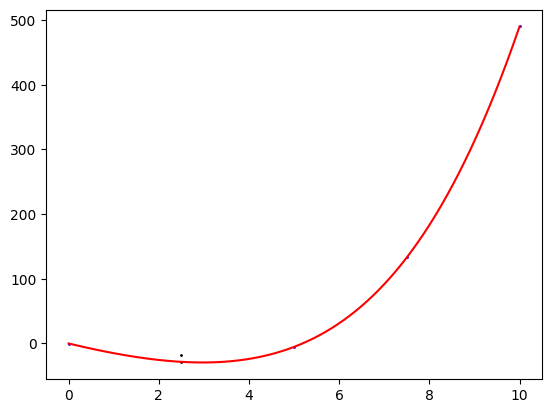

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
def ridge_regression(degree,data,y_data):
    x_data = get_polynomial_features(data,degree)
    x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1,random_state=42)
    model = Pipeline([
        ("",StandardScaler()),
        ("regg",Ridge(alpha= lambd))
    ])
    plot(x_train,y_train,x_test,y_test,model,degree)

num_samples = 5
degree = 8
start,end = 0,10
data = np.linspace(start,end,num_samples).reshape(-1,1)
y_data = data**3 - 5*data**2 - data + np.random.normal(loc = 0, scale = 0.1, size = num_samples).reshape(-1,1)
lambd = 0
ridge_regression(degree,data,y_data)